
# Profiling Pensiunan Mitra Bayar Bank Mandiri Taspen (Mantap)
Oleh : M. Amir Mustofa, Risang Surya Wibowo, Kinanthi Yurnalis





### Business Problem Understanding

    Company Profile
TASPEN adalah salah satu perusahaan BUMN yang bergerak di bidang asuransi sebagai pengelola program jaminan sosial bagi ASN dan Pejabat Negara. Hadirnya TASPEN memberikan kemudahan dan benefit bagi ASN dengan berbagai produk asuransi yang diberikan. Segmentasi pasar yang khusus memberikan tekanan bagi TASPEN untuk terus menggali ide-ide inovasi demi meningkatkan profit dan menjaga sustainability perusahaan. Berbekal human capital management dan IT infrastructure yang mumpuni, TASPEN mulai beradaptasi dalam memanfaatkan perkembangan teknologi dan informasi guna meningkatkan manfaat bagi peserta, stakeholder, dan karyawan internal. 

Seiring berjalannya waktu, TASPEN terus berbenah, mulai dari mendengarkan berbagai keluhan dari pelanggan, menganalisis kondisi persaingan di dunia asuransi, mengimplementasikan berbagai inovasi, dan bagaimana memperluas cakupan pasar dengan mendorong kinerja anak perusahaan. Dengan data peserta ASN dan TASPEN Group yang sangat kompleks memberikan keuntungan bagi TASPEN untuk dapat mengeksplorasi lebih detail apa yang menjadi pokok permasalahan yang dapat dikonversi menjadi pendapatan perusahaan. 

Memperhatikan persaingan di industri keuangan sekarang ini, hampir 90% semua perusahaan bisnis mereka memanfaatkan adanya perkembangan dunia IT. Bahkan jika kita melihat mayoritas perusahaan start-up adalah perusahaan dengan modal yang sangat minim dan hanya mengandalkan machine learning dari pemanfaatan big data. 

Target :
0 : Non Bank Mandiri TASPEN (MANTAP) sebagai mitra bayar pensiun Pertama
1 : Bank Mandiri TASPEN (MANTAP) sebagai mitra bayar pensiun Pertama

    Problem Statement
Belum maksimalnya Pensiunan memilih Bank Mandiri TASPEN sebagai Mitra bayar Pembayaran Klaim Pensiun Pertama.

    Goals & Implications

Maka berdasarkan permasalahan tersebut, perusahaan ingin memiliki kemampuan untuk memprediksi kemungkinan Calon Pensiunan TASPEN yang akan/ingin memilih mitra bayar Bank Mandiri TASPEN sebagai mitra bayar pensiun pertama atau tidak, sehingga dapat memfokuskan strategi pemasaran dan pelayanan.

Dan juga, perusahaan ingin mengetahui apa/faktor/variabel apa yang membuat seorang Calon Pensiunan memilih Bank Mantap sebagai mitra bayar pensiun pertama dibandingkan dengan mitra bayar lainnya.

Analytic Approach :

**   Limitations**
Penelitian ini terbatas pada data yang diberikan oleh perusahaan yang dalam hal ini diwakili oleh Corporate University Desk. 

    Analytic Approach
Jadi yang akan kita lakukan adalah menganalisis data untuk menemukan pola yang membedakan Calon Pensiunan yang memilih Bank MANTAP sebagai mitra bayar pensiun Pertama dan Bank lainnya.

Kemudian kita akan membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas Calon Pensiunan yang memilih Bank MANTAP sebagai mitra bayar pensiun Pertama dan bank lainnya.

    Evaluation Metrics

Type 1 error : False Positive
Konsekuensi: Sumber daya, tenaga, waktu dan biaya yang dikeluarkan sia-sia

Type 2 error : False Negative
Konsekuensi: kehilangan calon Pensiunan potensial, kehilangan potensi keuntungan

Berdasarkan konsekuensinya, maka sebisa mungkin yang akan kita lakukan adalah membuat model yang dapat mengurangi/meminimalisir cost pemasaran, tetapi tanpa membuat menjadi kurangnya/tidak cukup calon pensiunan potensial untuk menambah keuntungan perusahaan. Jadi harus kita seimbangkan nanti antara precision dan recallnya dari kelas positive (calon pensiunan potensial). Jadi nanti metric utama yang akan kita gunakan adalah roc_auc.

    Data Dictionary

Dataset merupakan data klaim Pensiun Pertama TASPEN mulai Bank Mandiri Taspen sebagai mitra bayar


| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| ID_PESERTA | Object | ID Peserta |
| TGL_KLAIM | Object | Tanggal klaim yang diajukan di Taspen |
| KDCABANG | Integer | Kode Kantor Cabang tempat pengajuan Klaim |
| KDKCU | Integer | Kode Kantor Cabang Utama tempat pengajuan Klaim |
| JENKEL | Integer | Jenis Kelamin Peserta |
| ID_JENIS_PEGAWAI | Integer | Jenis Pegawai Peserta |
| KDPANGKAT | Object | Kode Pangkat Peserta |
| STS_KAWIN | Integer | Status Kawin Peserta |
| JML_ISTRI | Integer | Jumlah Istri Peserta |
| JML_ANAK | Integer | Jumlah Anak Peserta |
| BUP | Integer | Batas Usia Pensiun Peserta |
| TMT_TASPEN | Object | Terhitung Mulai Tanggal Peserta menjadi ASN |
| TMT_KERJA | Object | Terhitung Mulai Tanggal Peserta bekerja pada instansi |
| TGL_KEJADIAN | Object | Tanggal Kejadian Peserta memasuki Masa Pensiun |
| LAMA_BEKERJA | Integer | lama bekerja mulai dari TMT_KERJA sampai BUP |
| THP | Integer | Take home pay |
| MANTAP | Integer | Pensiunan yang mengambil Pensiun Pertama di Bank Mantap atau Tidak |



In [1]:
# Import libraries

# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
import missingno as msno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from scipy.stats import shapiro

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, RandomForestClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb

# Model selection
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score,recall_score, precision_score, f1_score, precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# Imbalanced treatment
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from sklearn.metrics import fbeta_score, balanced_accuracy_score, brier_score_loss

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

# Set max columns
# pd.set_option('display.max_columns', None)

In [2]:
# Load dataset
df = pd.read_csv(r'Mantap_ok.csv')
df.head()

,ID_PESERTA,KDCABANG,KDKCU,JENKEL,ID_JENIS_PEGAWAI,KDPANGKAT,STS_KAWIN,JML_ISTRI,JML_ANAK,BUP,TMT_TASPEN,TMT_KERJA,TGL_KEJADIAN,LAMA_BEKERJA,THP,MANTAP
0,B39641316F97425C1700B06CFB291994,100,1,2,7,3C,2,1.0,0,58.0,1985-03-01,1985-03-01,2018-07-01,33,4202094,0
1,0DB137316F97425C1700B06CFB291994,100,1,2,7,3C,2,1.0,0,58.0,1981-03-01,1981-03-01,2020-01-01,39,4602400,0
2,32422A316F97425C1700B06CFB291994,100,1,2,7,3C,2,1.0,0,58.0,1985-03-01,1985-03-01,2018-07-01,33,4077000,0
3,CCA0EE316F97425C1700B06CFB291994,100,1,1,7,3C,2,1.0,0,58.0,1982-03-01,1982-03-01,2017-03-01,35,4393400,0
4,CE2129316F97425C1700B06CFB291994,100,1,1,7,3C,2,1.0,0,58.0,1994-03-01,1994-03-01,2017-01-01,23,3762330,0


In [3]:
df.columns

Index(['ID_PESERTA', 'KDCABANG', 'KDKCU', 'JENKEL', 'ID_JENIS_PEGAWAI',
       'KDPANGKAT', 'STS_KAWIN', 'JML_ISTRI', 'JML_ANAK', 'BUP', 'TMT_TASPEN',
       'TMT_KERJA', 'TGL_KEJADIAN', 'LAMA_BEKERJA', 'THP', 'MANTAP'],
      dtype='object')

### DATA CLEANING

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818061 entries, 0 to 818060
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID_PESERTA        818061 non-null  object 
 1   KDCABANG          818061 non-null  int64  
 2   KDKCU             818061 non-null  int64  
 3   JENKEL            818061 non-null  int64  
 4   ID_JENIS_PEGAWAI  818061 non-null  int64  
 5   KDPANGKAT         818060 non-null  object 
 6   STS_KAWIN         818061 non-null  int64  
 7   JML_ISTRI         817936 non-null  float64
 8   JML_ANAK          818061 non-null  int64  
 9   BUP               818060 non-null  float64
 10  TMT_TASPEN        818061 non-null  object 
 11  TMT_KERJA         818061 non-null  object 
 12  TGL_KEJADIAN      818061 non-null  object 
 13  LAMA_BEKERJA      818061 non-null  int64  
 14  THP               818061 non-null  int64  
 15  MANTAP            818061 non-null  int64  
dtypes: float64(2), int64

#JUMLAH DATA : 818.061

In [5]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID_PESERTA,object,0,0.00,818045,"[272AF5316F97425C1700B06CFB291994, A60C23316F9..."
1,KDCABANG,int64,0,0.00,57,"[402, 205]"
2,KDKCU,int64,0,0.00,6,"[5, 1]"
3,JENKEL,int64,0,0.00,2,"[1, 2]"
4,ID_JENIS_PEGAWAI,int64,0,0.00,18,"[29, 11]"
5,KDPANGKAT,object,1,0.00,49,"[VD, 6C]"
6,STS_KAWIN,int64,0,0.00,3,"[3, 1]"
7,JML_ISTRI,float64,125,0.02,4,"[1.0, 0.0]"
8,JML_ANAK,int64,0,0.00,3,"[1, 0]"
9,BUP,float64,1,0.00,10,"[65.0, 63.0]"


TERDAPAT DATA NULL PADA KOLOM :
- KDPANGKAT : 1 -> 0,00%
- JML ISTRI : 125 -> 0,02%
- BUP : 1 ->0,00%

Karena ID_Peserta merupakan key dalam data ini, dapat diketahui bahwa terdapat duplicate data yaitu sebanyak : 818.061-818.045=16 (16 record)

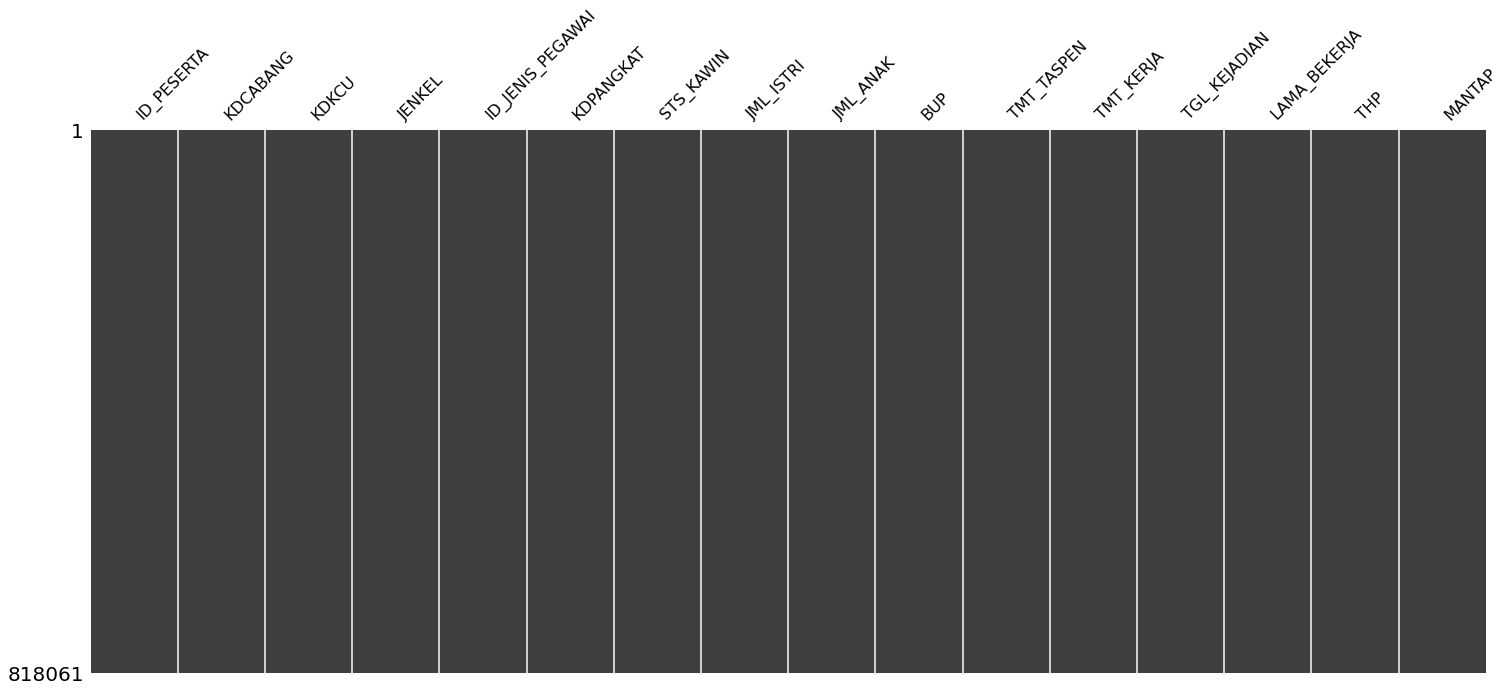

In [6]:
# Plot missing value matrix
msno.matrix(df, sparkline=False);

Karena presentase nilai null sangat kecil (0,00% dan 0,02%), maka tidak nampak terlihat.

In [7]:
df[df['JML_ISTRI'].isna() & df['STS_KAWIN']==1].count()

ID_PESERTA          125
KDCABANG            125
KDKCU               125
JENKEL              125
ID_JENIS_PEGAWAI    125
KDPANGKAT           125
STS_KAWIN           125
JML_ISTRI             0
JML_ANAK            125
BUP                 125
TMT_TASPEN          125
TMT_KERJA           125
TGL_KEJADIAN        125
LAMA_BEKERJA        125
THP                 125
MANTAP              125
dtype: int64

- Missing value jumlah istri (125 record) terlihat bahwa seluruh data dengan status kawin=1 (lajang)
- Missing value BUP kita asumsikan 58 (karena mayoritas PNS BUP=58) : 1 record
- drop missing value KDPANGKAT : 1 record


In [8]:
df['JML_ISTRI'] = df['JML_ISTRI'].fillna(0)

In [9]:
df['BUP'] = df['BUP'].fillna(58)

In [10]:
df[df['KDPANGKAT'].isnull()]

,ID_PESERTA,KDCABANG,KDKCU,JENKEL,ID_JENIS_PEGAWAI,KDPANGKAT,STS_KAWIN,JML_ISTRI,JML_ANAK,BUP,TMT_TASPEN,TMT_KERJA,TGL_KEJADIAN,LAMA_BEKERJA,THP,MANTAP
644936,BE9800A0DDDF585D1700B06C6CAFDB50,402,4,1,34,NaN,2,1.0,0,58.0,2008-01-01,2008-01-01,2015-09-01,7,0,0


In [11]:
df.drop(df[df['KDPANGKAT'].isnull()].index, inplace = True)

In [12]:
df.dropna()

,ID_PESERTA,KDCABANG,KDKCU,JENKEL,ID_JENIS_PEGAWAI,KDPANGKAT,STS_KAWIN,JML_ISTRI,JML_ANAK,BUP,TMT_TASPEN,TMT_KERJA,TGL_KEJADIAN,LAMA_BEKERJA,THP,MANTAP
0,B39641316F97425C1700B06CFB291994,100,1,2,7,3C,2,1.0,0,58.0,1985-03-01,1985-03-01,2018-07-01,33,4202094,0
1,0DB137316F97425C1700B06CFB291994,100,1,2,7,3C,2,1.0,0,58.0,1981-03-01,1981-03-01,2020-01-01,39,4602400,0
2,32422A316F97425C1700B06CFB291994,100,1,2,7,3C,2,1.0,0,58.0,1985-03-01,1985-03-01,2018-07-01,33,4077000,0
3,CCA0EE316F97425C1700B06CFB291994,100,1,1,7,3C,2,1.0,0,58.0,1982-03-01,1982-03-01,2017-03-01,35,4393400,0
4,CE2129316F97425C1700B06CFB291994,100,1,1,7,3C,2,1.0,0,58.0,1994-03-01,1994-03-01,2017-01-01,23,3762330,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818056,7A85E2316F97425C1700B06CFB291994,601,6,2,7,4B,2,1.0,0,60.0,1984-06-01,1984-06-01,2017-04-01,33,4772900,0
818057,AFA128316F97425C1700B06CFB291994,601,6,2,7,4B,2,1.0,0,60.0,1984-01-01,1984-01-01,2018-12-01,34,4923270,0
818058,D9C23A316F97425C1700B06CFB291994,601,6,2,7,4C,2,1.0,0,60.0,1986-03-01,1986-03-01,2020-03-01,34,5211500,0
818059,B0AD01326F97425C1700B06CFB291994,601,6,2,7,4C,3,0.0,1,58.0,1990-03-01,1990-03-01,2021-06-30,31,5371422,0


#Menghapus Data Duplicate

In [13]:
df = df.drop_duplicates()
df.head(5)

,ID_PESERTA,KDCABANG,KDKCU,JENKEL,ID_JENIS_PEGAWAI,KDPANGKAT,STS_KAWIN,JML_ISTRI,JML_ANAK,BUP,TMT_TASPEN,TMT_KERJA,TGL_KEJADIAN,LAMA_BEKERJA,THP,MANTAP
0,B39641316F97425C1700B06CFB291994,100,1,2,7,3C,2,1.0,0,58.0,1985-03-01,1985-03-01,2018-07-01,33,4202094,0
1,0DB137316F97425C1700B06CFB291994,100,1,2,7,3C,2,1.0,0,58.0,1981-03-01,1981-03-01,2020-01-01,39,4602400,0
2,32422A316F97425C1700B06CFB291994,100,1,2,7,3C,2,1.0,0,58.0,1985-03-01,1985-03-01,2018-07-01,33,4077000,0
3,CCA0EE316F97425C1700B06CFB291994,100,1,1,7,3C,2,1.0,0,58.0,1982-03-01,1982-03-01,2017-03-01,35,4393400,0
4,CE2129316F97425C1700B06CFB291994,100,1,1,7,3C,2,1.0,0,58.0,1994-03-01,1994-03-01,2017-01-01,23,3762330,0


In [14]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,ID_PESERTA,object,0,0.0,818044,"[711C37316F97425C1700B06CFB291994, 412341316F9..."
1,KDCABANG,int64,0,0.0,57,"[109, 609]"
2,KDKCU,int64,0,0.0,6,"[3, 4]"
3,JENKEL,int64,0,0.0,2,"[1, 2]"
4,ID_JENIS_PEGAWAI,int64,0,0.0,18,"[1, 29]"
5,KDPANGKAT,object,0,0.0,49,"[7I, 6D]"
6,STS_KAWIN,int64,0,0.0,3,"[1, 3]"
7,JML_ISTRI,float64,0,0.0,4,"[1.0, 0.0]"
8,JML_ANAK,int64,0,0.0,3,"[2, 0]"
9,BUP,float64,0,0.0,10,"[62.0, 0.0]"


In [15]:
df.count()

ID_PESERTA          818053
KDCABANG            818053
KDKCU               818053
JENKEL              818053
ID_JENIS_PEGAWAI    818053
KDPANGKAT           818053
STS_KAWIN           818053
JML_ISTRI           818053
JML_ANAK            818053
BUP                 818053
TMT_TASPEN          818053
TMT_KERJA           818053
TGL_KEJADIAN        818053
LAMA_BEKERJA        818053
THP                 818053
MANTAP              818053
dtype: int64

Jumlah data menjadi 818.053

### Exploratory Data Analysis ###

`General information`

In [16]:
df.describe()

,KDCABANG,KDKCU,JENKEL,ID_JENIS_PEGAWAI,STS_KAWIN,JML_ISTRI,JML_ANAK,BUP,LAMA_BEKERJA,THP,MANTAP
count,818053.000000,818053.000000,818053.000000,818053.000000,818053.000000,818053.000000,818053.000000,818053.000000,818053.000000,8.180530e+05,818053.000000
mean,368.367018,3.349127,1.393371,7.106449,1.985700,0.983643,0.021776,59.046195,33.685199,4.741232e+06,0.127950
std,188.650312,1.728274,0.488498,5.195721,0.129329,0.131380,0.175757,2.794011,6.657637,1.117770e+06,0.334034
min,100.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,-18.000000,0.000000e+00,0.000000
25%,203.000000,2.000000,1.000000,7.000000,2.000000,1.000000,0.000000,58.000000,32.000000,4.429300e+06,0.000000
50%,400.000000,3.000000,1.000000,7.000000,2.000000,1.000000,0.000000,60.000000,35.000000,4.974750e+06,0.000000
75%,503.000000,5.000000,2.000000,7.000000,2.000000,1.000000,0.000000,60.000000,38.000000,5.428976e+06,0.000000
max,704.000000,6.000000,2.000000,36.000000,3.000000,6.000000,2.000000,75.000000,94.000000,2.217600e+07,1.000000


In [17]:
df.head()

,ID_PESERTA,KDCABANG,KDKCU,JENKEL,ID_JENIS_PEGAWAI,KDPANGKAT,STS_KAWIN,JML_ISTRI,JML_ANAK,BUP,TMT_TASPEN,TMT_KERJA,TGL_KEJADIAN,LAMA_BEKERJA,THP,MANTAP
0,B39641316F97425C1700B06CFB291994,100,1,2,7,3C,2,1.0,0,58.0,1985-03-01,1985-03-01,2018-07-01,33,4202094,0
1,0DB137316F97425C1700B06CFB291994,100,1,2,7,3C,2,1.0,0,58.0,1981-03-01,1981-03-01,2020-01-01,39,4602400,0
2,32422A316F97425C1700B06CFB291994,100,1,2,7,3C,2,1.0,0,58.0,1985-03-01,1985-03-01,2018-07-01,33,4077000,0
3,CCA0EE316F97425C1700B06CFB291994,100,1,1,7,3C,2,1.0,0,58.0,1982-03-01,1982-03-01,2017-03-01,35,4393400,0
4,CE2129316F97425C1700B06CFB291994,100,1,1,7,3C,2,1.0,0,58.0,1994-03-01,1994-03-01,2017-01-01,23,3762330,0


In [18]:
df['MANTAP'].value_counts(normalize=True)

0    0.87205
1    0.12795
Name: MANTAP, dtype: float64

Sebesar 87,2% tidak menggunakan Bank Mantap sebagai mitra bayar pensiun pertama, sementara sisanya sebesar 12,8% menggunakan Bank Mantap sebagai mitra bayar pensiun pertama.

In [19]:
df['MANTAP'].unique()

array([0, 1], dtype=int64)

Distribusi dari Bank Mantap

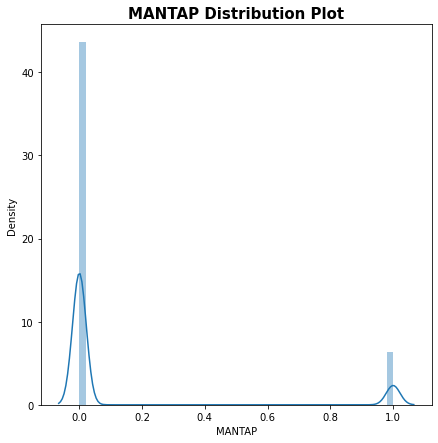

In [21]:
# Plot distribusi fitur 'MANTAP'
plt.figure(figsize=(7, 7))
sns.distplot(df['MANTAP'])
plt.title('MANTAP Distribution Plot', size=15, weight='bold');

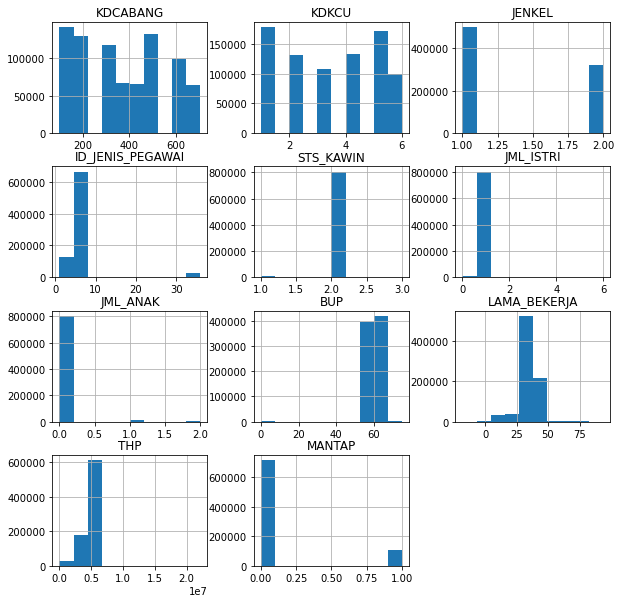

In [22]:
df.hist(figsize=(10, 10));

Grafik diatas menggambarkan jumlah data pada masing-masing feature sebagai faktor analisis model




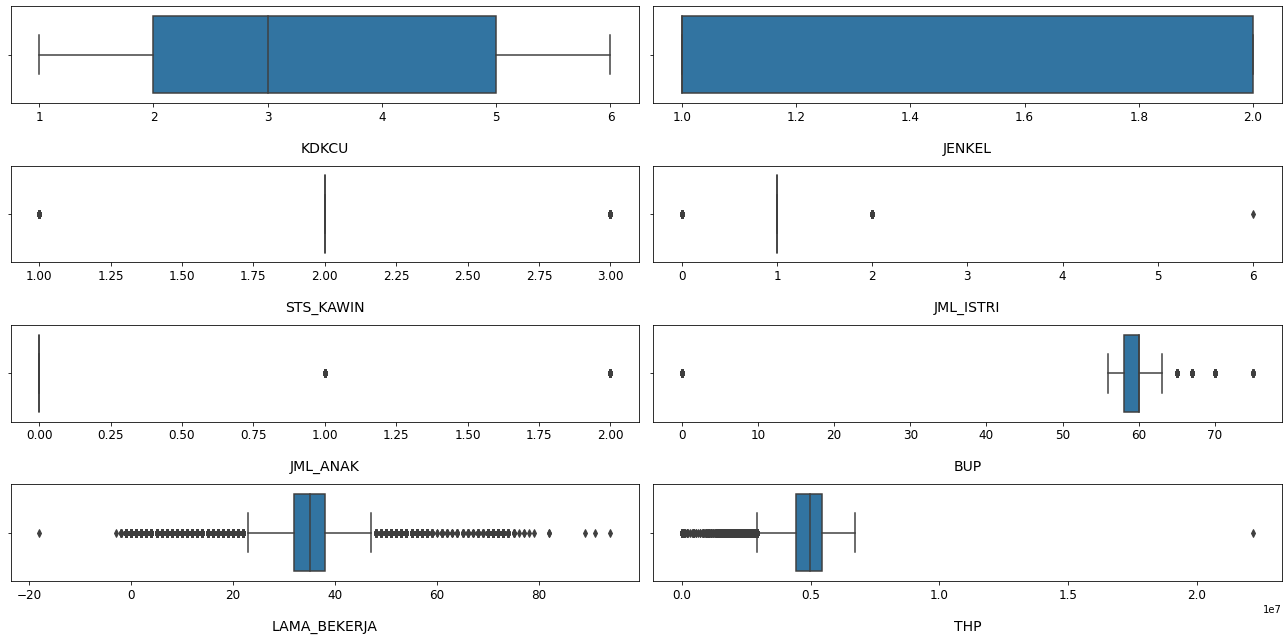

In [23]:
fig, ax = plt.subplots(2,2, figsize=(18, 9))

count = 1

for i in df.columns[((df.dtypes == 'int64') | (df.dtypes == 'float64')) & 
~df.columns.isin(['KDCABANG', 'ID_JENIS_PEGAWAI','MANTAP'])]:
    plt.subplot(4,2, count)
    sns.boxplot(x=df[i])
    plt.xlabel(i, fontsize=14, labelpad=18)
    plt.xticks(fontsize=12)
    count += 1

    ax[1,1].set_axis_off()
    ax[1,1].set_axis_off()

fig.tight_layout();

Terdapat OUtlier yang perlu diperhatikan, adalah sebagai berikut :
- BUP ada yg bernilai 0 (diubah menjadi 58)
- jumlah istri ada yg lbh dari 2 (dihapus)
- lama bekerja  <=0 dan ada yang bernilai besar, batas usia pensiun max 75th (dihapus)
- THP ada yang bernilai 0, dan ada outlier yg cukup besar (dihapus)

In [24]:
df[df['BUP']==0].count().head

<bound method NDFrame.head of ID_PESERTA          1378
KDCABANG            1378
KDKCU               1378
JENKEL              1378
ID_JENIS_PEGAWAI    1378
KDPANGKAT           1378
STS_KAWIN           1378
JML_ISTRI           1378
JML_ANAK            1378
BUP                 1378
TMT_TASPEN          1378
TMT_KERJA           1378
TGL_KEJADIAN        1378
LAMA_BEKERJA        1378
THP                 1378
MANTAP              1378
dtype: int64>

In [25]:
df.loc[df.BUP==0, 'BUP'] = 58

In [26]:
df[df['BUP']==0].count().head

<bound method NDFrame.head of ID_PESERTA          0
KDCABANG            0
KDKCU               0
JENKEL              0
ID_JENIS_PEGAWAI    0
KDPANGKAT           0
STS_KAWIN           0
JML_ISTRI           0
JML_ANAK            0
BUP                 0
TMT_TASPEN          0
TMT_KERJA           0
TGL_KEJADIAN        0
LAMA_BEKERJA        0
THP                 0
MANTAP              0
dtype: int64>

In [28]:
df.drop(df[df['THP'] >= 22176000].index, inplace = True)
df.drop(df[df['THP'] <= 0].index, inplace = True)
df.drop(df[df['JML_ISTRI'] > 2].index, inplace = True)
df.drop(df[df['LAMA_BEKERJA'] <= 0].index, inplace = True)
df.drop(df[df['LAMA_BEKERJA'] >60].index, inplace = True)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792487 entries, 0 to 818060
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID_PESERTA        792487 non-null  object 
 1   KDCABANG          792487 non-null  int64  
 2   KDKCU             792487 non-null  int64  
 3   JENKEL            792487 non-null  int64  
 4   ID_JENIS_PEGAWAI  792487 non-null  int64  
 5   KDPANGKAT         792487 non-null  object 
 6   STS_KAWIN         792487 non-null  int64  
 7   JML_ISTRI         792487 non-null  float64
 8   JML_ANAK          792487 non-null  int64  
 9   BUP               792487 non-null  float64
 10  TMT_TASPEN        792487 non-null  object 
 11  TMT_KERJA         792487 non-null  object 
 12  TGL_KEJADIAN      792487 non-null  object 
 13  LAMA_BEKERJA      792487 non-null  int64  
 14  THP               792487 non-null  int64  
 15  MANTAP            792487 non-null  int64  
dtypes: float64(2), int64

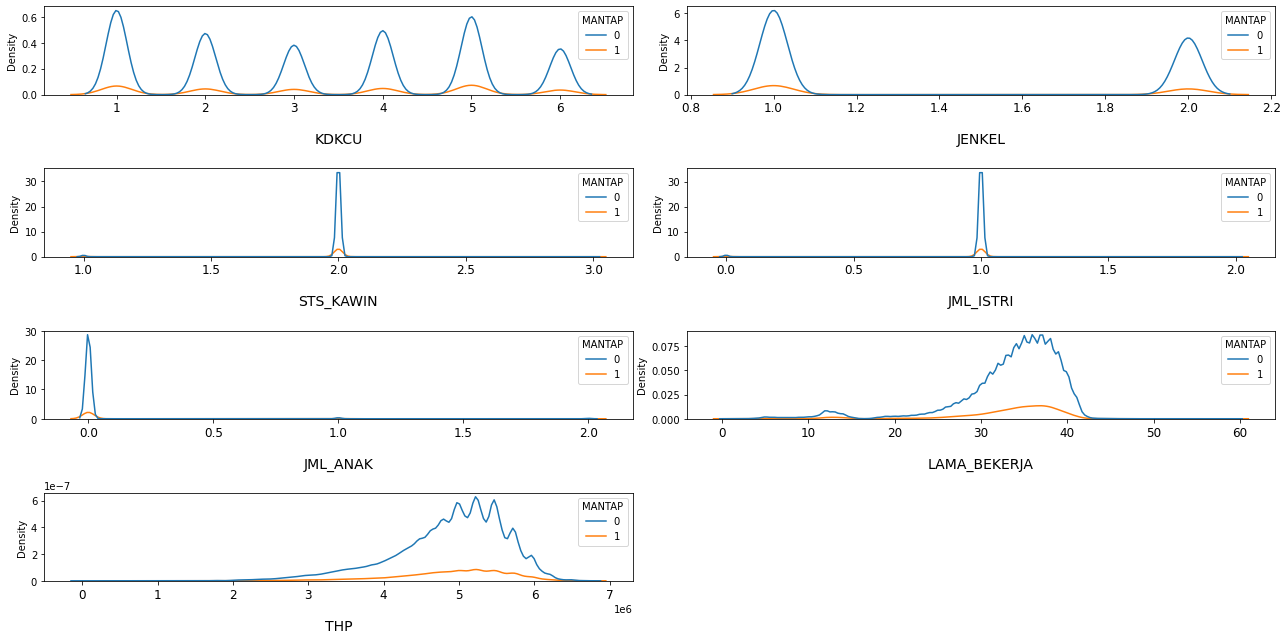

In [30]:
fig, ax = plt.subplots(2,2, figsize=(18, 9))

count = 1

for i in df.columns[((df.dtypes == 'int64') | (df.dtypes == 'float64')) & 
~df.columns.isin(['KDCABANG', 'ID_JENIS_PEGAWAI','BUP','MANTAP'])]:
    plt.subplot(4, 2, count)
    sns.kdeplot(x=df[i], hue=df['MANTAP'])
    plt.xlabel(i, fontsize=14, labelpad=18)
    plt.xticks(fontsize=12)
    count += 1


fig.tight_layout();

Seluruh grafik menggambarkan bahwa jumlah peserta yang menggunakan Bank Mantap sebagai mitra bayar pensiun pertama jauh lebih sedikit dibandingkan dengan Bank Lain

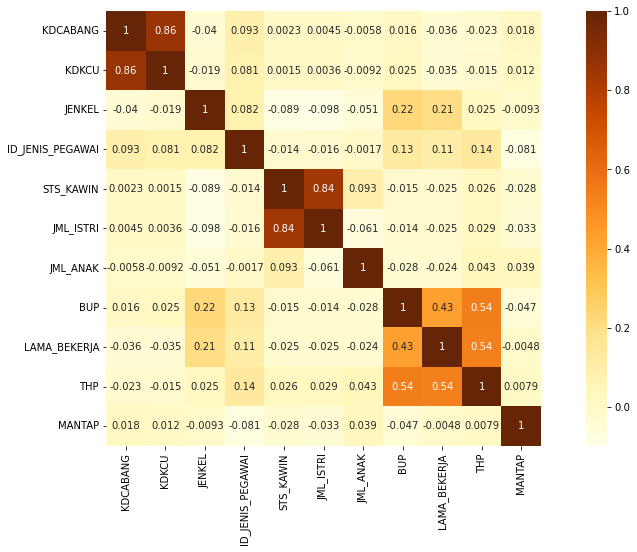

In [31]:
corr = df.corr(method='spearman')
plt.figure(figsize = (16, 8))
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot=True,
            cmap='YlOrBr', 
            square=True);

# Deskripsi
Rata-rata seluruh korelasi setiap paramater dengan parameter Mantap kecil, paling tinggi adalah korelasi antara parameter ID_Jenis Pegawai dengan paramater Mantap (8,1%)

`Drop Feature`


Feature yang tidak relevan untuk digunakan dalam tahapan selanjutnya adalah KDCABANG, KDPANGKAT, TMT_TASPEN, TMT_KERJA, TGL_KEJADIAN. Feature ini akan di-drop, guna memudahkan proses selanjutnya. 


Sedangkan untuk Feature ID_PESERTA tidak perlu dihapuskan karena dapat mengakibatkan pembacaan data menjadi duplikasi. 

In [32]:
df = df.drop(['KDCABANG', 'KDPANGKAT', 'TMT_TASPEN', 'TMT_KERJA', 'TGL_KEJADIAN'], axis=1)

In [33]:
df.head(5)

,ID_PESERTA,KDKCU,JENKEL,ID_JENIS_PEGAWAI,STS_KAWIN,JML_ISTRI,JML_ANAK,BUP,LAMA_BEKERJA,THP,MANTAP
0,B39641316F97425C1700B06CFB291994,1,2,7,2,1.0,0,58.0,33,4202094,0
1,0DB137316F97425C1700B06CFB291994,1,2,7,2,1.0,0,58.0,39,4602400,0
2,32422A316F97425C1700B06CFB291994,1,2,7,2,1.0,0,58.0,33,4077000,0
3,CCA0EE316F97425C1700B06CFB291994,1,1,7,2,1.0,0,58.0,35,4393400,0
4,CE2129316F97425C1700B06CFB291994,1,1,7,2,1.0,0,58.0,23,3762330,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792487 entries, 0 to 818060
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID_PESERTA        792487 non-null  object 
 1   KDKCU             792487 non-null  int64  
 2   JENKEL            792487 non-null  int64  
 3   ID_JENIS_PEGAWAI  792487 non-null  int64  
 4   STS_KAWIN         792487 non-null  int64  
 5   JML_ISTRI         792487 non-null  float64
 6   JML_ANAK          792487 non-null  int64  
 7   BUP               792487 non-null  float64
 8   LAMA_BEKERJA      792487 non-null  int64  
 9   THP               792487 non-null  int64  
 10  MANTAP            792487 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 88.7+ MB


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792487 entries, 0 to 818060
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID_PESERTA        792487 non-null  object 
 1   KDKCU             792487 non-null  int64  
 2   JENKEL            792487 non-null  int64  
 3   ID_JENIS_PEGAWAI  792487 non-null  int64  
 4   STS_KAWIN         792487 non-null  int64  
 5   JML_ISTRI         792487 non-null  float64
 6   JML_ANAK          792487 non-null  int64  
 7   BUP               792487 non-null  float64
 8   LAMA_BEKERJA      792487 non-null  int64  
 9   THP               792487 non-null  int64  
 10  MANTAP            792487 non-null  int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 88.7+ MB


In [36]:
df.describe()

,KDKCU,JENKEL,ID_JENIS_PEGAWAI,STS_KAWIN,JML_ISTRI,JML_ANAK,BUP,LAMA_BEKERJA,THP,MANTAP
count,792487.000000,792487.000000,792487.000000,792487.000000,792487.000000,792487.000000,792487.000000,792487.000000,7.924870e+05,792487.000000
mean,3.341597,1.400472,6.240733,1.985376,0.982666,0.022475,59.180708,33.496807,4.894001e+06,0.131755
std,1.729313,0.489994,1.954779,0.130864,0.130551,0.178508,1.394317,6.227758,7.360401e+05,0.338224
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,56.000000,1.000000,5.200000e+02,0.000000
25%,2.000000,1.000000,7.000000,2.000000,1.000000,0.000000,58.000000,32.000000,4.506096e+06,0.000000
50%,3.000000,1.000000,7.000000,2.000000,1.000000,0.000000,60.000000,35.000000,5.000000e+06,0.000000
75%,5.000000,2.000000,7.000000,2.000000,1.000000,0.000000,60.000000,37.000000,5.431900e+06,0.000000
max,6.000000,2.000000,34.000000,3.000000,2.000000,2.000000,75.000000,59.000000,6.727368e+06,1.000000


Text(0.5, 0, 'THP')

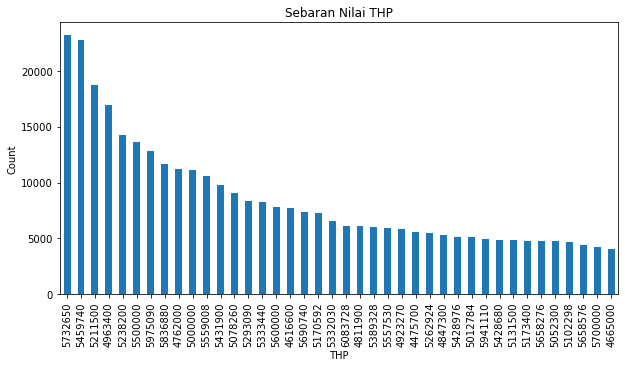

In [37]:
df.THP.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title('Sebaran Nilai THP')
plt.ylabel('Count')
plt.xlabel('THP')


Grafik menunjukan persebaran THP tersebar secara merata

In [38]:
df.drop(df[df['LAMA_BEKERJA'] <= 0].index, inplace = True)
print(df)

                              ID_PESERTA  KDKCU  JENKEL  ID_JENIS_PEGAWAI  \
0       B39641316F97425C1700B06CFB291994      1       2                 7   
1       0DB137316F97425C1700B06CFB291994      1       2                 7   
2       32422A316F97425C1700B06CFB291994      1       2                 7   
3       CCA0EE316F97425C1700B06CFB291994      1       1                 7   
4       CE2129316F97425C1700B06CFB291994      1       1                 7   
...                                  ...    ...     ...               ...   
818056  7A85E2316F97425C1700B06CFB291994      6       2                 7   
818057  AFA128316F97425C1700B06CFB291994      6       2                 7   
818058  D9C23A316F97425C1700B06CFB291994      6       2                 7   
818059  B0AD01326F97425C1700B06CFB291994      6       2                 7   
818060  75B4FC316F97425C1700B06CFB291994      6       1                 7   

        STS_KAWIN  JML_ISTRI  JML_ANAK   BUP  LAMA_BEKERJA      THP  MANTAP

`Data Inconsistencies`

In [39]:
df

,ID_PESERTA,KDKCU,JENKEL,ID_JENIS_PEGAWAI,STS_KAWIN,JML_ISTRI,JML_ANAK,BUP,LAMA_BEKERJA,THP,MANTAP
0,B39641316F97425C1700B06CFB291994,1,2,7,2,1.0,0,58.0,33,4202094,0
1,0DB137316F97425C1700B06CFB291994,1,2,7,2,1.0,0,58.0,39,4602400,0
2,32422A316F97425C1700B06CFB291994,1,2,7,2,1.0,0,58.0,33,4077000,0
3,CCA0EE316F97425C1700B06CFB291994,1,1,7,2,1.0,0,58.0,35,4393400,0
4,CE2129316F97425C1700B06CFB291994,1,1,7,2,1.0,0,58.0,23,3762330,0
...,...,...,...,...,...,...,...,...,...,...,...
818056,7A85E2316F97425C1700B06CFB291994,6,2,7,2,1.0,0,60.0,33,4772900,0
818057,AFA128316F97425C1700B06CFB291994,6,2,7,2,1.0,0,60.0,34,4923270,0
818058,D9C23A316F97425C1700B06CFB291994,6,2,7,2,1.0,0,60.0,34,5211500,0
818059,B0AD01326F97425C1700B06CFB291994,6,2,7,3,0.0,1,58.0,31,5371422,0


In [40]:
df['BUP'] = df['BUP'].astype('int64')
df['JML_ISTRI'] = df['JML_ISTRI'].astype('int64')

untuk merubah tipe data float menjadi integer

    Numerical

In [41]:
for i in df.columns[df.dtypes == 'int64']:
    print(i, '\n')
    print(df[i].unique().tolist(), '\n')

KDKCU 

[1, 2, 5, 6, 3, 4] 

JENKEL 

[2, 1] 

ID_JENIS_PEGAWAI 

[7, 2, 19, 12, 1, 34, 20, 17, 11, 18, 9, 29, 15, 8, 24] 

STS_KAWIN 

[2, 1, 3] 

JML_ISTRI 

[1, 0, 2] 

JML_ANAK 

[0, 1, 2] 

BUP 

[58, 60, 65, 70, 62, 56, 67, 75, 63] 

LAMA_BEKERJA 

[33, 39, 35, 23, 32, 21, 36, 34, 38, 40, 24, 28, 37, 22, 27, 31, 26, 30, 29, 25, 41, 12, 43, 44, 14, 19, 18, 15, 20, 13, 11, 42, 4, 10, 9, 5, 46, 8, 2, 1, 6, 7, 45, 52, 3, 17, 50, 16, 49, 47, 48, 51, 53, 56, 55, 57, 54, 59] 

THP 

[4202094, 4602400, 4077000, 4393400, 3762330, 4193500, 4150100, 4472050, 4473280, 4531670, 4446570, 4674450, 4614064, 3980480, 4086390, 4708880, 4160688, 4249500, 4347860, 4425630, 4033568, 4280800, 4119700, 3994000, 4461800, 4648112, 3872000, 4335540, 4696720, 4484700, 4909296, 5389328, 5898032, 5975090, 5836880, 6003354, 5211500, 4636494, 5131500, 4898100, 5266100, 5732650, 5015400, 5052300, 5224800, 5516940, 5658276, 5459740, 5431900, 5690740, 5658576, 5583834, 5617248, 5792710, 5373732, 4811900, 4567472,

**Types of Property Related to Bank Mantap**


Dimana data yang berpengaruh terhadap Bank Mantap adalah KDKCU, JENKEL, ID_JENIS_PEGAWAI, STS_KAWIN, JML_ISTRI, JML_ANAK, BUP, LAMA_BEKERJA, THP.

In [45]:
df_temp=df.dropna()

In [43]:
df_percent = pd.concat([round(pd.crosstab(df_temp['JENKEL'], df_temp['MANTAP']), 0),                   
                   round(pd.crosstab(df_temp['JENKEL'], df_temp['MANTAP']).apply(lambda r: r/r.sum(), axis=1) * 100, 2).astype(str).apply(lambda x:x + '%')], axis=1)
df_percent

MANTAP,0,1,0,1
JENKEL,,,,
1,411296,63822,86.57%,13.43%
2,276777,40592,87.21%,12.79%


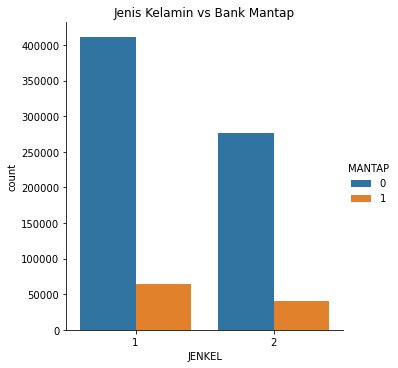

In [44]:
sns.catplot(x='JENKEL', kind='count', hue='MANTAP', data=df);
plt.title('Jenis Kelamin vs Bank Mantap');

Dari jenis kelamin dapat dsimpulkan bahwa jenis kelamin pria lebih banyak memilih Bank MANTAP sebagai mitra bayar pensiun pertama dibandingkan dengan wanita dengan jumlah perbandingan presentase 13,4% : 12,8%.

In [46]:
df_percent = pd.concat([round(pd.crosstab(df_temp['ID_JENIS_PEGAWAI'], df_temp['MANTAP']), 0),                   
                   round(pd.crosstab(df_temp['ID_JENIS_PEGAWAI'], df_temp['MANTAP']).apply(lambda r: r/r.sum(), axis=1) * 100, 2).astype(str).apply(lambda x:x + '%')], axis=1)
df_percent

MANTAP,0,1,0,1
ID_JENIS_PEGAWAI,,,,
1,859,473,64.49%,35.51%
2,100606,23959,80.77%,19.23%
7,582992,79758,87.97%,12.03%
8,1,0,100.0%,0.0%
9,12,1,92.31%,7.69%
11,20,0,100.0%,0.0%
12,2642,144,94.83%,5.17%
15,3,0,100.0%,0.0%
17,12,1,92.31%,7.69%


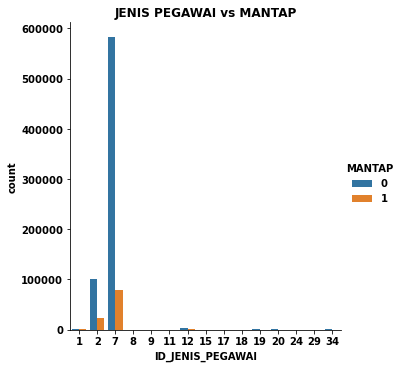

In [46]:
sns.catplot(x='ID_JENIS_PEGAWAI', kind='count', hue='MANTAP', data=df);
plt.title('JENIS PEGAWAI vs MANTAP');

ID Jenis pegawai Kode 2 (PNS DO) dan Kode 7 (PNS Pusat) mayoritas memilih non Bank Mantap sebagai mitra bayar pembayaran pensiun pertamanya. Secara presentase kode 1 (Pejabat Negara) lebih banyak.

In [47]:
df_percent = pd.concat([round(pd.crosstab(df_temp['STS_KAWIN'], df_temp['MANTAP']), 0),                   
                   round(pd.crosstab(df_temp['STS_KAWIN'], df_temp['MANTAP']).apply(lambda r: r/r.sum(), axis=1) * 100, 2).astype(str).apply(lambda x:x + '%')], axis=1)
df_percent

MANTAP,0,1,0,1
STS_KAWIN,,,,
1,9929,2736,78.4%,21.6%
2,677307,101439,86.97%,13.03%
3,837,239,77.79%,22.21%


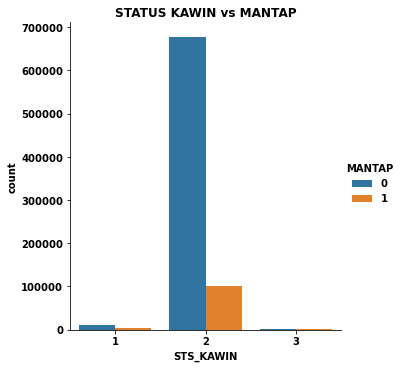

In [48]:

sns.catplot(x='STS_KAWIN', kind='count', hue='MANTAP', data=df);
plt.title('STATUS KAWIN vs MANTAP');

Di antara ketiga status kawin, Kode 2 (Menikah/Kawin) yang paling banyak memilih Bank Mantap sebagai mitra bayar pembayaran pensiun pertamanya dibandingkan status kawin lainnya. secara presentase kode 3 (Janda/Duda) paling tinggi dari total peserta dg kode sts_kawin=3

In [48]:
df_percent = pd.concat([round(pd.crosstab(df_temp['JML_ISTRI'], df_temp['MANTAP']), 0),                   
                   round(pd.crosstab(df_temp['JML_ISTRI'], df_temp['MANTAP']).apply(lambda r: r/r.sum(), axis=1) * 100, 2).astype(str).apply(lambda x:x + '%')], axis=1)
df_percent

MANTAP,0,1,0,1
JML_ISTRI,,,,
0,10766,2975,78.35%,21.65%
1,677305,101437,86.97%,13.03%
2,2,2,50.0%,50.0%


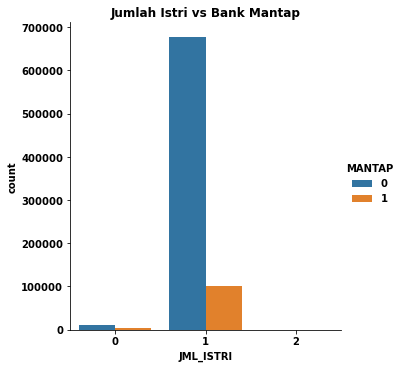

In [50]:
sns.catplot(x='JML_ISTRI', kind='count', hue='MANTAP', data=df);
plt.title('Jumlah Istri vs Bank Mantap');

Di antara jumlah istri yang ada pada data, Jumlah istri 1 (satu) yang paling banyak memilih Bank Mantap sebagai mitra bayar pembayaran pensiun pertamanya dibandingkan jumlah istri lainnya. namun secara presentase, status kawin 0 memiliki presentase yang paling besar.

In [49]:
df_percent = pd.concat([round(pd.crosstab(df_temp['JML_ANAK'], df_temp['MANTAP']), 0),                   
                   round(pd.crosstab(df_temp['JML_ANAK'], df_temp['MANTAP']).apply(lambda r: r/r.sum(), axis=1) * 100, 2).astype(str).apply(lambda x:x + '%')], axis=1)
df_percent

MANTAP,0,1,0,1
JML_ANAK,,,,
0,677374,101223,87.0%,13.0%
1,7672,2297,76.96%,23.04%
2,3027,894,77.2%,22.8%


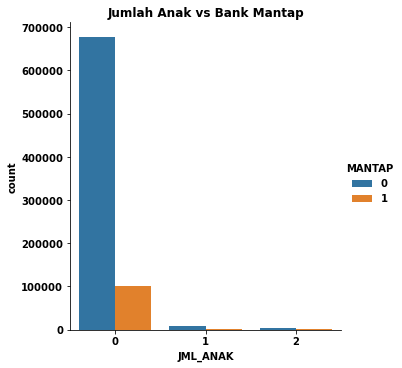

In [52]:
sns.catplot(x='JML_ANAK', kind='count', hue='MANTAP', data=df);
plt.title('Jumlah Anak vs Bank Mantap');

Belum adanya anak (Jumlah Anak 0) menjadi faktor mayoritas yang mempengaruhi pemilihan mitra bayar pensiunan pertama. Secara Persentase Jumlah anak 1 paling tinggi persentase

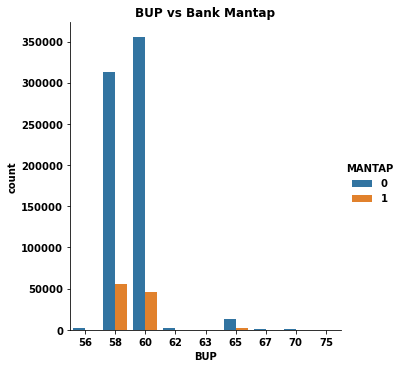

In [53]:
sns.catplot(x='BUP', kind='count', hue='MANTAP', data=df);
plt.title('BUP vs Bank Mantap');

In [50]:
df_percent = pd.concat([round(pd.crosstab(df_temp['BUP'], df_temp['MANTAP']), 0),                   
                   round(pd.crosstab(df_temp['BUP'], df_temp['MANTAP']).apply(lambda r: r/r.sum(), axis=1) * 100, 2).astype(str).apply(lambda x:x + '%')], axis=1)
df_percent

MANTAP,0,1,0,1
BUP,,,,
56,2622,142,94.86%,5.14%
58,313150,55685,84.9%,15.1%
60,355428,45554,88.64%,11.36%
62,2152,299,87.8%,12.2%
63,2,0,100.0%,0.0%
65,13244,2458,84.35%,15.65%
67,446,79,84.95%,15.05%
70,1015,192,84.09%,15.91%
75,14,5,73.68%,26.32%


Dari grafik yang ditampilkan dapat disimpulkan bahwa Usia BUP 58 tahun dan 60 tahun menjadi mayoritas dalam pemilihan mitra bayar pengambilan pensiun pertama, di mana presentase pemilihan mitra bayar non Bank Mantap lebih besar dari pada di Bank Mantap. Secara Persentase BUP 75 paling tinggi meskipun jumlah BUP pada 75 cukup sedikit.

In [51]:
df_percent = pd.concat([round(pd.crosstab(df_temp['THP'], df_temp['MANTAP']), 0),                   
                   round(pd.crosstab(df_temp['THP'], df_temp['MANTAP']).apply(lambda r: r/r.sum(), axis=1) * 100, 2).astype(str).apply(lambda x:x + '%')], axis=1)
df_percent

MANTAP,0,1,0,1
THP,,,,
520,1,0,100.0%,0.0%
1350,1,0,100.0%,0.0%
1860,1,0,100.0%,0.0%
2820,1,0,100.0%,0.0%
33300,1,0,100.0%,0.0%
...,...,...,...,...
6491320,508,135,79.0%,21.0%
6521940,11,3,78.57%,21.43%
6567572,2,0,100.0%,0.0%


Cukup beragam nilai THP

In [52]:
df_percent = pd.concat([round(pd.crosstab(df_temp['KDKCU'], df_temp['MANTAP']), 0),                   
                   round(pd.crosstab(df_temp['KDKCU'], df_temp['MANTAP']).apply(lambda r: r/r.sum(), axis=1) * 100, 2).astype(str).apply(lambda x:x + '%')], axis=1)
df_percent

MANTAP,0,1,0,1
KDKCU,,,,
1,151564,22661,86.99%,13.01%
2,110013,15024,87.98%,12.02%
3,88940,13783,86.58%,13.42%
4,115041,16212,87.65%,12.35%
5,140149,24653,85.04%,14.96%
6,82366,12081,87.21%,12.79%


Secara persentase maupun jumlah, KDKCU 5 (KCU Surabaya) paling inggi memilih Bank Mantap sebagai kantor bayar.

In [54]:
df_percent = pd.concat([round(pd.crosstab(df_temp['LAMA_BEKERJA'], df_temp['MANTAP']), 0),                   
                   round(pd.crosstab(df_temp['LAMA_BEKERJA'], df_temp['MANTAP']).apply(lambda r: r/r.sum(), axis=1) * 100, 2).astype(str).apply(lambda x:x + '%')], axis=1)
df_percent

MANTAP,0,1,0,1
LAMA_BEKERJA,,,,
1,50,54,48.08%,51.92%
2,49,27,64.47%,35.53%
3,86,36,70.49%,29.51%
4,373,110,77.23%,22.77%
5,1457,452,76.32%,23.68%
6,1131,220,83.72%,16.28%
7,962,129,88.18%,11.82%
8,899,104,89.63%,10.37%
9,1142,118,90.63%,9.37%


Secara jumlah lama bekerja 37 paling banyak memilih bank Mantap. Secara Persentase lama bekerja 50 tahun paling banyak memilih Bank Mantap sebagai mitra bayar pensiun pertama

In [55]:
import warnings
warnings.filterwarnings('ignore')

columns = ['KDKCU','JENKEL', 'ID_JENIS_PEGAWAI', 'STS_KAWIN', 'JML_ISTRI', 'JML_ANAK', 'BUP', 'LAMA_BEKERJA', 'THP']

feature = []
pvalue = []
conclusion = []

for i in columns:
    feature.append(i)
    tstat, pval = shapiro(df_temp[i])
    pvalue.append(pval)

    # Conclusion
    if pval < 0.05 :
        conclusion.append('Reject H0')
    else :
        conclusion.append('Fail to reject H0')

pd.DataFrame(
                {
                 'Feature' : feature,
                 'p-Value' : pvalue,
                 'Conclusion' : conclusion
                }
            )

,Feature,p-Value,Conclusion
0,KDKCU,0.0,Reject H0
1,JENKEL,0.0,Reject H0
2,ID_JENIS_PEGAWAI,0.0,Reject H0
3,STS_KAWIN,0.0,Reject H0
4,JML_ISTRI,0.0,Reject H0
5,JML_ANAK,0.0,Reject H0
6,BUP,0.0,Reject H0
7,LAMA_BEKERJA,0.0,Reject H0
8,THP,0.0,Reject H0


Distribusi data dari numerical features tidak mennggambarkan distribusi normal. Untuk itu, menggunakan korelasi Spearman. 

In [56]:
df_temp.drop(['MANTAP'], axis=1).corr(method='spearman')

,KDKCU,JENKEL,ID_JENIS_PEGAWAI,STS_KAWIN,JML_ISTRI,JML_ANAK,BUP,LAMA_BEKERJA,THP
KDKCU,1.000000,-0.019472,0.081062,0.001483,0.003637,-0.009226,0.024970,-0.034716,-0.015387
JENKEL,-0.019472,1.000000,0.081994,-0.089411,-0.098309,-0.051443,0.223830,0.205492,0.024943
ID_JENIS_PEGAWAI,0.081062,0.081994,1.000000,-0.014279,-0.015954,-0.001679,0.128113,0.109068,0.137289
STS_KAWIN,0.001483,-0.089411,-0.014279,1.000000,0.843258,0.092827,-0.014763,-0.024777,0.025962
JML_ISTRI,0.003637,-0.098309,-0.015954,0.843258,1.000000,-0.061384,-0.014225,-0.025165,0.028837
JML_ANAK,-0.009226,-0.051443,-0.001679,0.092827,-0.061384,1.000000,-0.028283,-0.023905,0.042773
BUP,0.024970,0.223830,0.128113,-0.014763,-0.014225,-0.028283,1.000000,0.429194,0.543031
LAMA_BEKERJA,-0.034716,0.205492,0.109068,-0.024777,-0.025165,-0.023905,0.429194,1.000000,0.535717
THP,-0.015387,0.024943,0.137289,0.025962,0.028837,0.042773,0.543031,0.535717,1.000000


In [57]:
df['MANTAP'] = df['MANTAP'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792487 entries, 0 to 818060
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   ID_PESERTA        792487 non-null  object
 1   KDKCU             792487 non-null  int64 
 2   JENKEL            792487 non-null  int64 
 3   ID_JENIS_PEGAWAI  792487 non-null  int64 
 4   STS_KAWIN         792487 non-null  int64 
 5   JML_ISTRI         792487 non-null  int64 
 6   JML_ANAK          792487 non-null  int64 
 7   BUP               792487 non-null  int64 
 8   LAMA_BEKERJA      792487 non-null  int64 
 9   THP               792487 non-null  int64 
 10  MANTAP            792487 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 72.6+ MB


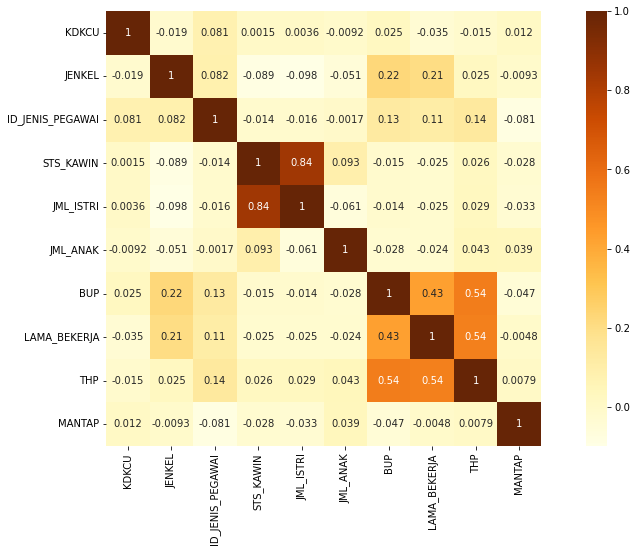

In [58]:
corr = df.corr(method='spearman')
plt.figure(figsize = (16, 8))
sns.heatmap(corr,
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot=True,
            cmap='YlOrBr', 
            square=True);

In [68]:
# Preview of dataset
def preview(df):
    '''
    Returns a summary of attributes including dtype, proportion of missing values,
    number of unique values, and sample.
    '''
    
    df_check = []
    for i in df.columns:
        df_check .append([
                    i,
                    df[i].dtype,
                    df[i].isna().sum(),
                    round(df[i].isna().sum() / len(df) * 100, 2),
                    df[i].nunique(),
                    df[i].drop_duplicates().values])
        
    return pd.DataFrame(df_check, columns=['Features', 'DataType', 'Null', 'Proportion', 'Uniques', 'UniqueSample'])

In [69]:
preview(df)

,Features,DataType,Null,Proportion,Uniques,UniqueSample
0,ID_PESERTA,object,0,0.0,792479,"[B39641316F97425C1700B06CFB291994, 0DB137316F9..."
1,KDKCU,int64,0,0.0,6,"[1, 2, 5, 6, 3, 4]"
2,JENKEL,int64,0,0.0,2,"[2, 1]"
3,ID_JENIS_PEGAWAI,int64,0,0.0,15,"[7, 2, 19, 12, 1, 34, 20, 17, 11, 18, 9, 29, 1..."
4,STS_KAWIN,int64,0,0.0,3,"[2, 1, 3]"
5,JML_ISTRI,int64,0,0.0,3,"[1, 0, 2]"
6,JML_ANAK,int64,0,0.0,3,"[0, 1, 2]"
7,BUP,int64,0,0.0,9,"[58, 60, 65, 70, 62, 56, 67, 75, 63]"
8,LAMA_BEKERJA,int64,0,0.0,58,"[33, 39, 35, 23, 32, 21, 36, 34, 38, 40, 24, 2..."
9,THP,int64,0,0.0,4032,"[4202094, 4602400, 4077000, 4393400, 3762330, ..."


### Modeling ###

`Data Transformation`

**Schemas:**

1. Scaled using RobustScaler.
       
        BUP dan THP.

2. No treatment.
 
        KDKCU, JENKEL, STS_KAWIN, ID_JENIS_PEGAWAI, JML_ISTRI, JML_ANAK, LAMA_BEKERJA
        

In [60]:
df.columns.tolist()

['ID_PESERTA',
 'KDKCU',
 'JENKEL',
 'ID_JENIS_PEGAWAI',
 'STS_KAWIN',
 'JML_ISTRI',
 'JML_ANAK',
 'BUP',
 'LAMA_BEKERJA',
 'THP',
 'MANTAP']

In [71]:
df.head()

,ID_PESERTA,KDKCU,JENKEL,ID_JENIS_PEGAWAI,STS_KAWIN,JML_ISTRI,JML_ANAK,BUP,LAMA_BEKERJA,THP,MANTAP
0,B39641316F97425C1700B06CFB291994,1,2,7,2,1,0,58,33,4202094,0
1,0DB137316F97425C1700B06CFB291994,1,2,7,2,1,0,58,39,4602400,0
2,32422A316F97425C1700B06CFB291994,1,2,7,2,1,0,58,33,4077000,0
3,CCA0EE316F97425C1700B06CFB291994,1,1,7,2,1,0,58,35,4393400,0
4,CE2129316F97425C1700B06CFB291994,1,1,7,2,1,0,58,23,3762330,0


In [61]:
# Resampling data (10% sample size using stratified sampling method)
# By using a confidence level of 95%, the minimum sample size is around 384. 
# Thus, 10% of total data is around 80k rows, which is much more than sufficient.

df = df.groupby('MANTAP', group_keys=False).apply(lambda x: x.sample(frac=0.1))
df

,ID_PESERTA,KDKCU,JENKEL,ID_JENIS_PEGAWAI,STS_KAWIN,JML_ISTRI,JML_ANAK,BUP,LAMA_BEKERJA,THP,MANTAP
111498,D75A29316F97425C1700B06CFB291994,1,1,7,2,1,0,58,31,3515076,0
547978,6B1602326F97425C1700B06CFB291994,3,1,2,2,1,0,58,37,5293090,0
214096,914A36316F97425C1700B06CFB291994,1,1,7,2,1,0,58,36,5658576,0
393048,CD08EE316F97425C1700B06CFB291994,2,2,7,2,1,0,58,33,4612850,0
668756,82C81D316F97425C1700B06CFB291994,1,1,7,2,1,0,58,31,4807990,0
...,...,...,...,...,...,...,...,...,...,...,...
111043,C758F3316F97425C1700B06CFB291994,1,1,7,2,1,0,58,36,5115660,1
209712,41BD06326F97425C1700B06CFB291994,2,2,7,2,1,0,60,34,4565214,1
317073,361AE9316F97425C1700B06CFB291994,6,2,7,2,1,0,60,38,5500000,1
354947,2C0B00326F97425C1700B06CFB291994,2,1,7,2,1,0,60,38,6083728,1


In [62]:
# Check the proportion
df['MANTAP'].value_counts(normalize=True)

0    0.868249
1    0.131751
Name: MANTAP, dtype: float64

In [77]:
list_standard_scaler = ['BUP', 'LAMA_BEKERJA', 'THP']                             

# Define semua process transformasi yang akan dilakukan, dibungkus di dalam sebuah column transformer
transformer = ColumnTransformer(
                                    [
                                        ('robust_scaler', StandardScaler(), list_standard_scaler)
                                    ],
                                    remainder='passthrough' 
                               )

    Data splitting

In [78]:
list_remainder = ['KDKCU', 'JENKEL', 'STS_KAWIN','ID_JENIS_PEGAWAI', 'JML_ISTRI', 'JML_ANAK']

input_vars = []
input_vars.extend(list_standard_scaler + list_remainder) 

X = df[input_vars]
y = df['MANTAP']

In [79]:
input_vars

['BUP',
 'LAMA_BEKERJA',
 'THP',
 'KDKCU',
 'JENKEL',
 'STS_KAWIN',
 'ID_JENIS_PEGAWAI',
 'JML_ISTRI',
 'JML_ANAK']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X,
                                                    y,
                                                    stratify=y, # untuk menjaga proporsi antar kelas di target/label
                                                    test_size=0.2, 
                                                    random_state=42)

In [82]:
y_train.value_counts(normalize=True)

0    0.868245
1    0.131755
Name: MANTAP, dtype: float64

In [83]:
df_result = pd.DataFrame(transformer.fit_transform(X_train))
df_result.head()

,0,1,2,3,4,5,6,7,8
0,-0.85061,0.241468,0.370701,1.0,1.0,2.0,2.0,1.0,0.0
1,-0.85061,-1.196063,-1.695075,3.0,2.0,2.0,7.0,1.0,0.0
2,-0.85061,0.560919,-0.000844,5.0,1.0,2.0,2.0,1.0,0.0
3,-0.85061,-0.077983,0.085894,2.0,2.0,2.0,7.0,1.0,0.0
4,-0.85061,-0.077983,0.925407,6.0,1.0,2.0,7.0,1.0,0.0


In [84]:
transformer.transformers_

[('robust_scaler', StandardScaler(), ['BUP', 'LAMA_BEKERJA', 'THP']),
 ('remainder', 'passthrough', [3, 4, 5, 6, 7, 8])]

In [85]:
feature_names = list_standard_scaler + list_remainder
feature_names

['BUP',
 'LAMA_BEKERJA',
 'THP',
 'KDKCU',
 'JENKEL',
 'STS_KAWIN',
 'ID_JENIS_PEGAWAI',
 'JML_ISTRI',
 'JML_ANAK']

In [86]:
df_result = pd.DataFrame(transformer.fit_transform(X_train), columns=feature_names)
df_result.head()

,BUP,LAMA_BEKERJA,THP,KDKCU,JENKEL,STS_KAWIN,ID_JENIS_PEGAWAI,JML_ISTRI,JML_ANAK
0,-0.85061,0.241468,0.370701,1.0,1.0,2.0,2.0,1.0,0.0
1,-0.85061,-1.196063,-1.695075,3.0,2.0,2.0,7.0,1.0,0.0
2,-0.85061,0.560919,-0.000844,5.0,1.0,2.0,2.0,1.0,0.0
3,-0.85061,-0.077983,0.085894,2.0,2.0,2.0,7.0,1.0,0.0
4,-0.85061,-0.077983,0.925407,6.0,1.0,2.0,7.0,1.0,0.0


In [87]:
preview(df_result)

,Features,DataType,Null,Proportion,Uniques,UniqueSample
0,BUP,float64,0,0.0,7,"[-0.8506100335352033, 0.5760106436004077, 4.14..."
1,LAMA_BEKERJA,float64,0,0.0,49,"[0.24146797251962487, -1.1960629759710568, 0.5..."
2,THP,float64,0,0.0,1864,"[0.37070123751292405, -1.695075056517879, -0.0..."
3,KDKCU,float64,0,0.0,6,"[1.0, 3.0, 5.0, 2.0, 6.0, 4.0]"
4,JENKEL,float64,0,0.0,2,"[1.0, 2.0]"
5,STS_KAWIN,float64,0,0.0,3,"[2.0, 3.0, 1.0]"
6,ID_JENIS_PEGAWAI,float64,0,0.0,10,"[2.0, 7.0, 12.0, 19.0, 34.0, 20.0, 1.0, 29.0, ..."
7,JML_ISTRI,float64,0,0.0,2,"[1.0, 0.0]"
8,JML_ANAK,float64,0,0.0,3,"[0.0, 2.0, 1.0]"


In [88]:
# Define models
logreg = LogisticRegression(random_state=42, solver='liblinear')
tree = DecisionTreeClassifier(random_state=42, max_depth=5)

# Random Forest
rf = RandomForestClassifier(
    random_state=42,
    max_depth=5
)

# Boosting models
ada_boost = AdaBoostClassifier(
    random_state=42
)

grad_boost = GradientBoostingClassifier(
    random_state=42,
    max_depth=5
)

xgboost = xgb.XGBClassifier(use_label_encoder=False, verbosity=0) 

In [89]:
# Define imbalanced treatments
rus = RandomUnderSampler(random_state=42, sampling_strategy=0.8)
ros = RandomOverSampler(random_state=42, sampling_strategy=0.8)
smote = SMOTE(random_state=42, sampling_strategy=0.8)
nearmiss = NearMiss(sampling_strategy=0.8)

# Define end-to-end pipeline
list_model = [logreg, tree, rf, ada_boost, grad_boost, xgboost]
list_imb_treatment = [rus, ros, smote, nearmiss]
score = []
mean_score = []
std_score = []

for i in list_model:
    for j in list_imb_treatment:
        skfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
        estimator = Pipeline([
            ('preprocessing', transformer),
            ('resampling', j),
            ('model', i)
        ])

        model_cv = cross_val_score(
                                    estimator, 
                                    X_train, 
                                    y_train, 
                                    cv=skfold,
                                    scoring='f1', 
                                    n_jobs=1,
                                    error_score='raise'
                                )
        score.append(model_cv)
        mean_score.append(model_cv.mean())
        std_score.append(model_cv.std())

In [90]:
# Membuat list untuk setiap kombinasi antara model dan imbalanced treatment dengan bantuan itertools
import itertools

model_treatment = list(itertools.product([i.__class__.__name__ for i in list_model], [j.__class__.__name__ for j in list_imb_treatment]))
len(model_treatment)

24

In [91]:
# Menyiapkan bahan untuk kolom 'Model' pada DataFrame
list_models_name = ['logreg', 'tree', 'rf', 'ada_boost', 'grad_boost', 'xgboost']

# Agar tiap nama model ada repetisi sebanyak 4 kali (karena imbalanced treatments ada 4 variasi)
model_name = list(itertools.chain.from_iterable(itertools.repeat(x, 4) for x in [name for name in list_models_name]))
len(model_name)

24

In [93]:
# Buat DataFrame untuk menampilkan hasil
pd.DataFrame({
    'Model': model_name,
    'Model_treatment': model_treatment,
    'F1_mean_score': mean_score,
    'F1_std_score': std_score
}).sort_values(by='F1_mean_score', ascending=False).reset_index(drop=True)

,Model,Model_treatment,F1_mean_score,F1_std_score
0,xgboost,"(XGBClassifier, RandomUnderSampler)",0.248666,0.003765
1,grad_boost,"(GradientBoostingClassifier, RandomUnderSampler)",0.240279,0.002289
2,grad_boost,"(GradientBoostingClassifier, RandomOverSampler)",0.239963,0.004529
3,xgboost,"(XGBClassifier, RandomOverSampler)",0.239471,0.003040
4,ada_boost,"(AdaBoostClassifier, RandomOverSampler)",0.237528,0.003654
5,ada_boost,"(AdaBoostClassifier, RandomUnderSampler)",0.235743,0.003594
6,xgboost,"(XGBClassifier, NearMiss)",0.234749,0.002366
7,grad_boost,"(GradientBoostingClassifier, NearMiss)",0.234321,0.001498
8,rf,"(RandomForestClassifier, NearMiss)",0.233606,0.003275
9,ada_boost,"(AdaBoostClassifier, NearMiss)",0.233241,0.001059


Dari Hasil tersebut didapatkan hasil yang paling baik yaitu menggunakan model xgboost dengan resampling RandomUnderSampler. dapat dilihat hasilnya pun tidak terlalu baik

**Model performance (test set)**

Menggunakan Model xgboost dg resampling rus dari hasil terbaik yang diperoleh sebelumnya

In [94]:
estimator_xgboost = Pipeline([
    ('preprocess', transformer),
    ('resampling', rus),
    ('model', xgboost)
])

estimator_xgboost.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  StandardScaler(),
                                                  ['BUP', 'LAMA_BEKERJA',
                                                   'THP'])])),
                ('resampling',
                 RandomUnderSampler(random_state=42, sampling_strategy=0.8)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_cate...
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', use_label_encoder=False,
                               validate_parameters=1, verbosity=0))])

In [95]:
# Predict to X_test
y_pred_xgboost = estimator_xgboost.predict(X_test)

In [96]:
# Sebagai pengganti nilai metrics di cell bawah
print(classification_report(y_test, y_pred_xgboost))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81     13762
           1       0.19      0.39      0.25      2088

    accuracy                           0.69     15850
   macro avg       0.54      0.56      0.53     15850
weighted avg       0.80      0.69      0.73     15850



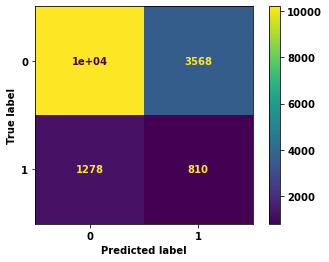

In [98]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_xgboost)

ConfusionMatrixDisplay(cm).plot();

#### **Hyperparameter tuning**

In [99]:
# Define list of hyperparameters yang mau di-tuning

hyperparam_space= {
    'model__eta': [0.1, 0.3, 0.5], # benchmark 0.3
    'model__gamma': [1, 0, 0.1], # benchmark 0
    'model__max_depth': [4, 5, 6], # benchmark 6
    'model__lambda': [1, 0.5, 0.1, 0.05, 0.01] # benchmark 1
}

In [100]:
# Hyperparameter tuning dengan menggunakan pipeline
estimator_xgb_tuning = Pipeline([
    ('preprocessing', transformer),
    ('resampling', rus),
    ('model', xgboost)
])

# Define crossval
crossval = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)

# Inisialisasi grid search
grid_search_xgb = GridSearchCV(
    estimator_xgb_tuning, 
    param_grid = hyperparam_space, 
    cv=crossval,
    scoring='f1', 
    return_train_score=True, 
    n_jobs=1
)

In [101]:
# Fitting data training untuk mencari nilai hyperparameter terbaik
grid_search_xgb.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('robust_scaler',
                                                                         StandardScaler(),
                                                                         ['BUP',
                                                                          'LAMA_BEKERJA',
                                                                          'THP'])])),
                                       ('resampling',
                                        RandomUnderSampler(random_state=42,
                                                           sampling_strategy=0.8)),
                                       ('model',
                                        XGBClassifier(base_score=0.5,...
                                                      num_parallel_tree=1,
                                                      predictor='auto',
                                                      random_state=0,
                                                      reg_alpha=0, reg_lambda=1,
                                                      scale_pos_weight=1,
                                                      subsample=1,
                                                      tree_method='exact',
                                                      use_label_encoder=False,
                                                      validate_parameters=1,
                                                      verbosity=0))]),
             n_jobs=1,
             param_grid={'model__eta': [0.1, 0.3, 0.5],
                         'model__gamma': [1, 0, 0.1],
                         'model__lambda': [1, 0.5, 0.1, 0.05, 0.01],
                         'model__max_depth': [4, 5, 6]},
             return_train_score=True, scoring='f1')

In [102]:
# Cek hasil grid search
tuning_result = pd.DataFrame(grid_search_xgb.cv_results_).sort_values(by='rank_test_score').head(1)
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__eta,param_model__gamma,param_model__lambda,param_model__max_depth,params,split0_test_score,...,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
40,0.406413,0.00553,0.031166,0.00369,0.1,0.1,0.05,5,"{'model__eta': 0.1, 'model__gamma': 0.1, 'mode...",0.254032,...,0.255073,0.250023,0.006406,1,0.320953,0.32134,0.329371,0.321275,0.323235,0.003546


In [103]:
# Cek nilai metric terbaik dan hyperparams value terbaik
print(grid_search_xgb.best_score_)
print(grid_search_xgb.best_params_)

0.25002254965678145
{'model__eta': 0.1, 'model__gamma': 0.1, 'model__lambda': 1, 'model__max_depth': 5}


**Before & after tuning comparison**

In [106]:
grid_search_xgb.best_estimator_[2]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, gamma=0.1, gpu_id=-1, importance_type=None,
              interaction_constraints='', lambda=1, learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [107]:
# Fitting ulang dengan hasil grid-search
best_model_xgb = grid_search_xgb.best_estimator_
best_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust_scaler',
                                                  StandardScaler(),
                                                  ['BUP', 'LAMA_BEKERJA',
                                                   'THP'])])),
                ('resampling',
                 RandomUnderSampler(random_state=42, sampling_strategy=0.8)),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_c...
                               importance_type=None, interaction_constraints='',
                               lambda=1, learning_rate=0.300000012,
                               max_delta_step=0, max_depth=5,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', use_label_encoder=False,
                               validate_parameters=1, ...))])

In [108]:
# Predict to X_test menggunakan hasil tuning
y_pred_best_xgb = best_model_xgb.predict(X_test)

In [109]:
# Metrics before tuning
print('Accuracy score =', accuracy_score(y_test, y_pred_xgboost))
print('Recall score =', recall_score(y_test, y_pred_xgboost))
print('Precision score =', precision_score(y_test, y_pred_xgboost))
print('F1-score =', f1_score(y_test, y_pred_xgboost))

Accuracy score = 0.6942586750788644
Recall score = 0.3879310344827586
Precision score = 0.18501598903608954
F1-score = 0.2505412929167955


In [110]:
# Metrics after tuning
print('Accuracy score =', accuracy_score(y_test, y_pred_best_xgb))
print('Recall score =', recall_score(y_test, y_pred_best_xgb))
print('Precision score =', precision_score(y_test, y_pred_best_xgb))
print('F1-score =', f1_score(y_test, y_pred_best_xgb))

Accuracy score = 0.7101577287066246
Recall score = 0.3726053639846743
Precision score = 0.1915312653865091
F1-score = 0.2530081300813008


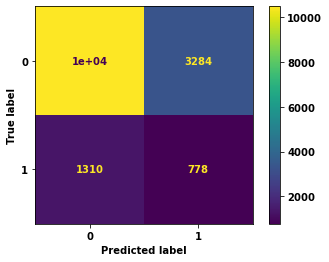

In [111]:
# Plot confusion matrix untuk penalized model
cm_tree_pen = confusion_matrix(y_test, y_pred_best_xgb)

ConfusionMatrixDisplay(cm_tree_pen).plot();

Setelah dilakukan Tunning, hasil tidak jauh berbeda dari hasil awal dengan hasil yang tidak cukup baik

**Feature importance**

    XGBoost

In [112]:
from xgboost import plot_importance

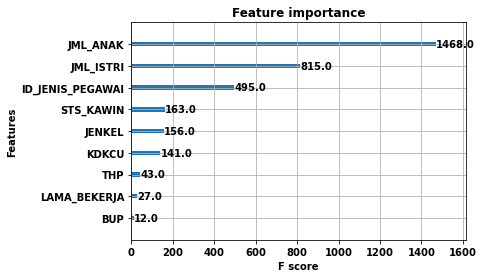

In [113]:
plot_importance(xgboost).set_yticklabels(feature_names);

Jumlah anak dan Jumlah istri menjadi feature paling penting terhadap pemodelan yang dibuat

>Conclusion & Recommendation

               precision    recall  f1-score   support

           0       0.89      0.74      0.81     13762
           1       0.19      0.39      0.25      2088

    accuracy                           0.69     15850
   macro avg       0.54      0.56      0.53     15850
weighted avg       0.80      0.69      0.73     15850


CONCLUSION

Berdasarkan hasil classification report dari model yang dihasilkan, kita dapat mengambil kesimpulan bahwa :
>1. Dari semua calon pensiunan yang diprediksi oleh model akan memilih Bank Mantap sebagai mitra bayar pensiunan pertama, hanya 19% yang benar-benar memilih Bank Mantap sebagai mitra bayar pensiunan pertama.
>2. Dari semua calon pensiunan yang memilih Bank Mantap sebagai mitra bayar pensiunan pertama, model hanya memprediksi dengan benar sebanyak 39% yang memilih Bank Mantap sebagai mitra bayar pensiunan pertama. 
>3. Dari berbagai variabel yang diteliti, variabel yang paling berpengaruh terhadap model ini adalah Jumlah Anak dan Jumlah Istri. Di mana variabel lainnya turut mempengaruhi dan berada di bawah kedua variabel tersebut.
>4. Dari analisis yang dilakukan, dihasilkan metode yang tidak cukup bagus dalam memprediksi hubungan antar variabel.


RECOMMENDATION

Beberapa rekomendasi yang dapat dilakukan untuk mengembangkan project ini antara lain : 
>1. Menyusun dan membuat strategi baru yang mendorong pensiunan untuk dapat memilih Bank Mantap sebagai mitra bayar pensiunan pertama. 
>2. Menambahkan variabel lokasi ATM Bank Mantap, Jumlah Cabang Bank Mantap perwilayah, dan Alamat tinggal pensiunan untuk meningkatkan hasil pemodelan yang dilakukan. Dari kondisi ini akan meningkatkan awareness dan engagement antara Pensiunan dengan Bank Mantap.
>3. Melakukan survey dengan membagikan kuisioner kepada peserta pensiunan untuk mengetahui kepuasan pelanggan terhadap layanan dari Bank Mantap yang hasilnya sebagai bahan monitoring dan evaluasi.
>4. Meningkatkan pelayanan dengan memberikan berbagai fasilitas tambahan (loyalty benefit, kerja sama dengan berbagai merchant, kredit kepemilikan rumah, motor, dan mobil, dsb.) untuk menjaga engagement kepada pensiunan.
>5. Melakukan riset dan benchmarking dengan tujuan untuk memberikan bunga yang lebih kompetitif dibandingkan mitra bank yang lain agar pensiunan lebih tertarik untuk memilih Bank Mantap sebagai mitra bayar.
>6. Melakukan penawaran produk asuransi Taspen Life (Taspen Dwiguna Sejahtera, Taspen Smart Save, Taspen Bright Life, dsb)  yang sesuai dengan profil setiap pensiunan dan sebagai bentuk kerja sama peningkatan pendapatan ekosistem TASPEN Group. 

